# Import library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy
import cv2
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import KFold
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import  mean_absolute_error
from sklearn.model_selection import train_test_split
from IPython.display import Image, display
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Model



%matplotlib inline

# Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%cd "/content/drive/MyDrive/Academia/Research/Computer Vision/Earthquake_damage_detection/Data"
%cd "/content/drive/My Drive/Study/HonorThesis/"

/content/drive/My Drive/Study/HonorThesis


In [ ]:
df = pd.read_csv (r"Predictors_Linear_regression_columns.csv")

In [ ]:
df

,1111,1112,1113,1121,1122,1123,1131,1132,1133,1211,1212,1213,1221,1222,1223,1231,1232,1233,1311,1312,1313,1321,1322,1323,1331,1332,1333,2111,2112,2113,2121,2122,2123,2131,2132,2133,2211,2212,2213,2221,...,2312,2313,2321,2322,2323,2331,2332,2333,3111,3112,3113,3121,3122,3123,3131,3132,3133,3211,3212,3213,3221,3222,3223,3231,3232,3233,3311,3312,3313,3321,3322,3323,3331,3332,3333,maxDrift,File,Pic ID,Cycle ID,Group
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.180,IMG_0035,IMG_0035.JPG,c7-,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0.180,IMG_0042,IMG_0042.JPG,c7-,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0.180,IMG_1314,IMG_1314.JPG,c7-,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.180,IMG_1315,IMG_1315.JPG,c7-,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0.180,IMG_1316,IMG_1316.JPG,c7-,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.024,IMG_1356,IMG_1356.JPG,c24+,28
92,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,2,1,1,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.027,IMG_0136,IMG_0136.JPG,c25+,29
93,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,2,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.027,IMG_0137,IMG_0137.JPG,c25+,29
94,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.027,IMG_0139,IMG_0139.JPG,c25+,29


In [ ]:
dataMaxDrift = [] #labels
imageLst = []     
groupName = []    # group to working on kfold

#store value after train
Store_history = []
mae_per_fold = []
Loss_per_fold = []
test_predictions = []
actual_values = []
predict_images = []
store_model = []


Str_path = 'Data4/'
img_height = 320
img_width = 320
numb_epochs = 150

In [ ]:
groupName = df['Group']
groupName = list(groupName)

In [ ]:
x_sample = df.drop(["maxDrift",'File','Pic ID', 'Cycle ID','Group'], axis=1)
x_sample = np.array(x_sample)

In [ ]:
x_sample.shape

(96, 81)

In [ ]:
y = df['maxDrift']

### Build Model

In [ ]:
n = 8
gkf = GroupKFold(n_splits = n)

In [ ]:
for train, test in gkf.split(x_sample, y, groups = groupName):
  model_1 = tf.keras.models.Sequential([
                                        
      tf.keras.layers.Dense(80,input_dim=81, activation='relu', kernel_regularizer=None),
      tf.keras.layers.Dense(1, activation='linear')])
  model_1.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = 'mae', metrics=['mae'])
  model_1.summary()

  History = model_1.fit(x = x_sample[train] , 
                      y = y[train] , 
                      validation_data = (x_sample[test] ,y[test]), 
                      epochs = numb_epochs, 
                      verbose=2)
    
    
  store_model.append(model_1)
  Store_history.append(History)
  test_prediction = model_1.predict(x_sample[test])
  test_predictions.append(np.array(test_prediction))
    
  actual_value = y[test].copy()
  actual_values.append(np.array(actual_value))
  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                6560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 6,641
Trainable params: 6,641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
3/3 - 3s - loss: 0.9983 - mae: 0.9983 - val_loss: 0.5154 - val_mae: 0.5154
Epoch 2/150
3/3 - 0s - loss: 0.7032 - mae: 0.7032 - val_loss: 0.2895 - val_mae: 0.2895
Epoch 3/150
3/3 - 0s - loss: 0.4023 - mae: 0.4023 - val_loss: 0.0789 - val_mae: 0.0789
Epoch 4/150
3/3 - 0s - loss: 0.3595 - mae: 0.3595 - val_loss: 0.1013 - val_mae: 0.1013
Epoch 5/150
3/3 - 0s - loss: 0.2997 - mae: 0.2997 - val_loss: 0.1218 - val_mae: 0.1218
Epoch 6/150
3/3 - 0s - loss: 0.2702 - mae: 0.2702 - val_loss: 0.0675 - val_mae: 0

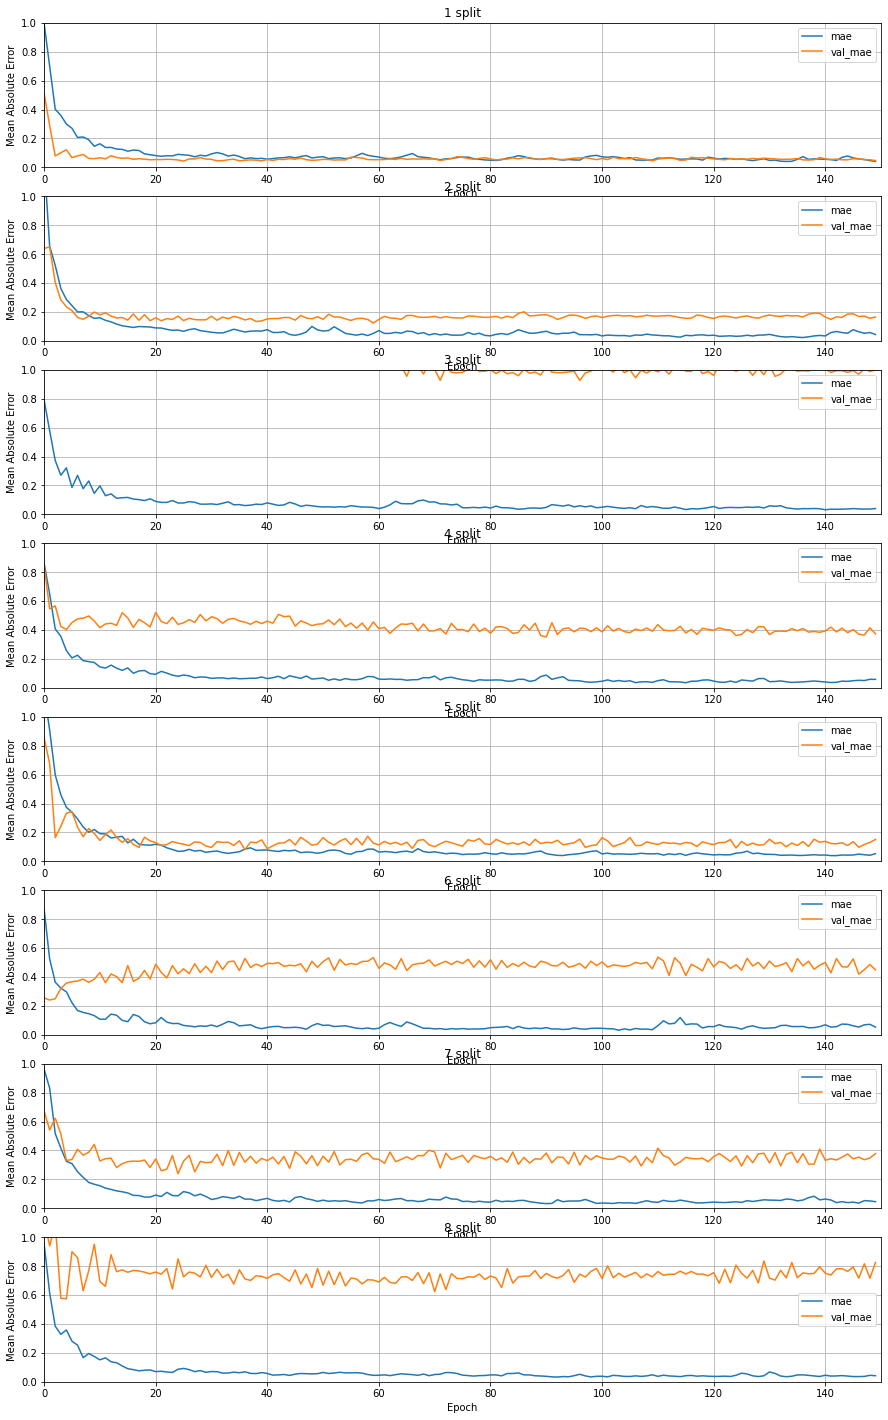

In [ ]:
fig, ax = plt.subplots(figsize=(15,25))
ax.axis("off")
for i in range(n):
     
     plt.subplot(n,1,i+1)
     plt.plot(Store_history[i].history['mae'], label='mae')
     plt.plot(Store_history[i].history['val_mae'], label='val_mae')
     plt.title(f"{i+1} split")
     plt.ylim([0, 1])
     plt.xlim([0,numb_epochs])
     plt.xlabel('Epoch')
     plt.ylabel('Mean Absolute Error')
     plt.legend()
     plt.grid(True)

In [ ]:
test_labels = list(np.concatenate(actual_values).flat)
test_predictions = list(np.concatenate(test_predictions).flat)

In [ ]:
mean_absolute_error(test_labels, test_predictions)

0.4235428511171291

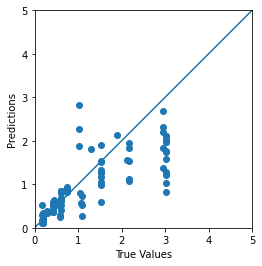

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

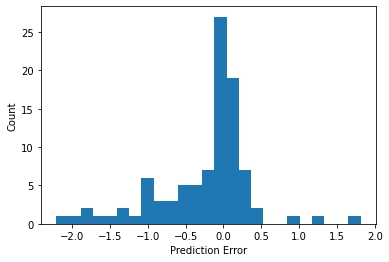

In [ ]:
error = np.array(test_predictions) - np.array(test_labels)
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')